<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Metode Komputing Eksplorasi Menggunakan Python
*oleh Mark Bakker*
## Topik Lanjutan Notebook 1: Menghitung titik nol sebuah fungsi

Menghitung titik nol sebuah fungsi, atau mencari akar dari sebuah fungsi, adalah hal yang umum dilakukan dalam metode komputing eksplorasi. Paket bernama `scipy` menyediakan berbagai metode yang dapat digunakan untuk menghampiri titik nol dari sebuah fungsi dengan satu variabel atau lebih. Dalam Notebook ini, kita akan mencoba dua metode untuk menghitung akar sebuah fungsi; Metode Bagi-Dua (*Bisection*) dan Metode Newton. Di bagian akhir dari Notebook ini, kita akan menggunakan fungsi-fungsi yang disediakan oleh `scipy` untuk memproduksi hasil yang sama dengan kedua metode di atas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Metode Bagi-Dua (*Bisection*)
Metode Bagi-Dua adalah metode sederhana untuk menemukan akar dari sebuah fungsi. Pertama-tama, fungsi yang akan dihitung harus didefinisikan, e.g. $f(x)$, beserta dua nilai dari variabel $x$, i.e. $x_1$ dan $x_2$, di mana nilai 0 dari fungsi $f(x)$ terletak di antara kedua variabel tersebut. Karena nilai 0 dari $f(x)$ terletak di antara $x_1$ dan $x_2$, maka $f(x)$ akan memiliki nilai positif pada salah satu variabel $x$ dan nilai negatif pada variabel yang lain. Dengan kata lain, hasil dari operasi perkalian antara $f(x)$ di titik $x_1$ dan $x_2$ akan memiliki nilai negatif: $f(x_1)f(x_2)<0$. Apabila kondisi ini terpenuhi, dan $f(x)$ adalah fungsi yang kontinu, hipotesis bahwa $f(x)$ bernilai 0 di antara titik $x_1$ dan $x_2$ berlaku. Metode Bagi-Dua menghampiri nilai 0 dari fungsi $f(x)$ menggunakan iterasi di mana jarak antara dua variabel yang mendefinisikan lokasi akar dari fungsi $f(x)$ akan dipotong setengahnya pada tiap iterasi. Pemotongan jarak dilakukan dengan menghitung titik tengah dari kedua variabel $x$, disebut $x_m$ dalam Notebook ini, dan nilai $f(x)$ pada titik tersebut. Langkah selanjutnya adalah mengganti salah satu dari dua variabel $x$ inisial, $x_1$ dan $x_2$, dengan $x_m$. Hal ini harus dilakukan dengan tetap memastikan bahwa $f(x)$ memiliki nilai positif pada salah satu titik dan nilai negatif di titik yang lainnya. Pemotongan interval ini terus dilakukan sampai kira-kira jarak antara dua variabel $x$ menjadi sangat kecil. Algoritma yang digunakan dalam Metode Bagi-Dua adalah sebagai berikut:
1. Hitung $f(x)$ pada $x_1$ dan $x_2$, jangan lupa pastikan bahwa $f(x_1)f(x_2)<0$.
2. Hitung $x_m = \frac{1}{2}(x_1+x_2)$.
3. Hitung $f(x_m)$.
4. Apabila $f(x_m)f(x_2)<0$, tukar $x_1$ dengan $x_m$, selain itu, tukar $x_2$ dengan $x_m$.
5. Tes apakah $|x_1-x_2|<\varepsilon$, di mana $\varepsilon$ adalah variabel yang anda definisikan sebagai batas toleransi terhadap interval antara kedua variabel $x$ yang dapat diterima. Apabila pernyataan di atas tidak diterima maka ulangi perhitungan dari langkah ke dua.

Ingat bahwa sebuah fungsi dapat digunakan sebagai argumen dari fungsi yang lainnya dalam lingkungan Python. Contoh kode di bawah ini menggambarkan sebuah fungsi, `square me`, yang akan mengembalikan nilai kuadrat dari fungsi-fungsi dengan satu variabel, i.e. $f(x)$, pada lokasi $x$ yang diberikan. Dalam contoh ini, fungsi `square me` digunakan bersama-sama dengan `cos`.

In [2]:
def square_me( func, x ):
    return func(x)**2
print('Hasil dari fungsi square me: ',square_me( np.cos, 4 ))
print('Hasil dari secara langsung menghitung nilai kuadrat: ',np.cos(4)**2)

Hasil dari fungsi square me:  0.427249983096
Hasil dari secara langsung menghitung nilai kuadrat:  0.427249983096


### Latihan 1. <a name="back1"></a>Metode Bagi-Dua

*Langkah 1.*
Buatlah sebuah fungsi dalam Python untuk menghitung $f(x)=\frac{1}{2}-\text{e}^{-x}$ dan plot nilai dari fungsi tersebut pada $x=0$ sampai dengan $x=4$. Perhatikan bahwa $f(x)$ bernilai 0 di antara ke dua batas-batas yang diberikan. Tentunya nilai 0 dari fungsi $f(x)$ tidak sulit untuk ditentukan dalam contoh ini. Tujuan utama dari Latihan 1 adalah untuk memastikan bahwa kode yang telah kita buat dapat berfungsi sebagaimana mestinya.

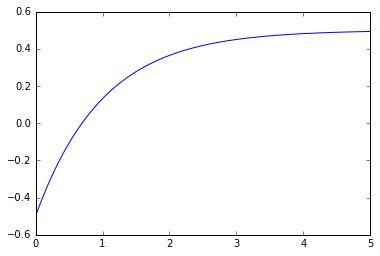

In [33]:
def coba (x):
    return 0.5-np.exp(-x)
x=np.arange(0,5,0.01)
y=coba(x)
plt.plot(x,y)

*Langkah 2.* Buatlah fungsi lainnya yang bertujuan untuk mengaplikasikan Metode Bagi-Dua dalam perhitungan anda. Beri nama fungsi ini, `bisectionmet`. Fungsi `bisectionmet` yang anda buat harus mencakup argumen-argumen di bawah ini:

1. Fungsi yang menggambarkan perhitungan untuk mencari nilai 0 dari $f(x)$.
2. $x_1$ dan $x_2$.
3. `tol` sebagai batas toleransi interval untuk menghentikan iterasi dan sebagai salah satu argumen kata kunci dari fungsi `bisection`. Gunakan 0.001 sebagai nilai default untuk `tol`.
4. `nmax` sebagai jumlah iterasi maksimum dan argumen kata kunci yang lainnya. Gunakan 10, sebagai contoh, sebagai nilai default dari `nmax`.

Ketika fungsi `bisectionmet` yang anda buat dipanggil, fungsi ini harus mampu mengembalikan nilai dari variabel $x$ di mana nilai dari $f(x)$ menghampiri 0. Selain dari itu, fungsi anda juga harus dapat memberikan peringatan apabila jumlah maksimum dari iterasi telah digunakan sebelum batas toleransi tercapai.

Dalam menulis kode anda, aplikasikan poin 2 sampai 5 pada algoritma yang dijelaskan di atas dalam sebuah *loop* sebanyak `nmax` kali. Iterasi dihentikan ketika `tol` telah tercapai, mungkin sebelum iterasi mencapai `nmax` kali, dengan menggunakan perintah `break`. Hal ini penting untuk dimasukkan untuk menghindarkan anda dari iterasi tak hingga seperti yang akan terjadi apabila anda menggunakan perintah `while` untuk mengeksekusi metode iterasi.

Selain itu, ada baiknya untuk menampilkan nilai-nilai dari $x_1$, $x_2$, $f(x_1)$, dan $f(x_2)$ di layar komputer anda pada setiap iterasi sehingga anda dapat mengevaluasi kinerja dari kode yang telah anda tulis (a.k.a *code debugging*).

Gunakan fungsi `bisectionmet` yang telah anda buat untuk menghitung nilai 0 dari $f(x)$ yang telah anda definisikan pada *Langkah 1*. Pastikan bahwa nilai dari `tol` adalah 0.001, anda dapat mengatur batas toleransi ini sendiri.

In [36]:
def bisectionmet(func,x1,x2,nmax,tol):
    for i in range(nmax):
        y1=func(x1)
        y2=func(x2)
        xm=0.5*(x1+x2)
        ym=func(xm)
        if y2*ym<0:
            x1=xm
        else:
            x2=xm
        if abs(x1-x2)<tol:
            break
    return (x1+x2)/2,i,abs(x1-x2)
nilainol=bisectionmet(coba,0.,1.,100,0.00001)      
print (nilainol)
        
        

(0.6931495666503906, 16, 7.62939453125e-06)


*Langkah 3.*

Buktikan bahwa fungsi `bisectionmet` yang telah anda buat dapat bekerja dengan benar dengan menghitung akar dari $f(x)=cos(x)$ di antara $x_1=0$ dan $x_2=3$. Gunakan pernyataan `bisectionmet(np.cos, 0, 3, tol=1e-6, nmax=30)` untuk memanggil fungsi `bisectionmet` anda.

In [40]:
nilainol=bisectionmet(np.cos, 0., 3., 30,1e-6)      
print (nilainol)
        

(1.5707963705062866, 21, 7.152557373046875e-07)


<a href="#ex1answer">Kunci Jawaban untuk Latihan 1</a>

### Metode Newton

Metode Bagi-Dua yang telah kita pelajari di awal Notebook ini adalah metode yang secara kasar menghitung lokasi dari titik nol dari sebuah fungsi, di mana metode ini secara pasti dapat digunakan apabila anda dapat mendefinisikan secara benar lokasi dua variabel $x$ di mana nilai nol dari $f(x)$ terletak di antara dua batas-batas tersebut dan $f(x)$ adalah fungsi yang kontinu. Secara teknis, Metode Bagi-Dua tidaklah efisien untuk digunakan karena memerlukan evaluasi yang berulang serta kemampuan pengguna untuk menentukan interval yang kira-kira mengandung $f(x)=0$. Alternatif yang lebih cerdas adalah dengan menggunakan Metode Newton, juga dikenal sebagai Metode Newton-Raphson, namun sayangnya metode ini tidak memiliki garansi 100% fungsional, seperti yang akan dijelaskan di bawah ini.

Mari kita coba untuk menghitung akar dari fungsi yang direpresentasikan dengan kurva berwarna biru pada grafik di bawah ini. Metode Newton diawali dengan anda mendefinisikan titik mula; $x_0$ pada contoh di bawah ini dan diperlihatkan dengan titik berwarna biru. Langkah selanjutnya adalah dengan mengepaskan sebuah garis lurus yang melewati titik $(x,y)=(x_0,f(x_0))$ sebagaimana sehingga garis ini menyinggung kurva $f(x_0)$ (garis merah). Perpotongan antara garis berwarna merah ini dengan sumbu horizontal adalah perkiraan lokasi titik nol dari fungsi $f(x)$ yang selanjutnya, i.e. $x_1$ (titik merah). Proses ini dilanjutkan sampai nilai $f(x)$ menjadi sangat kecil. Singkatnya, buat sebuah garis lurus yang melewati titik $(x,y)=(x_1,f(x_1))$ dan menyinggung kurva fungsi $f(x)$ di titik $x_1$. Perpotongan antara garis ini dengan sumbu horizontal adalah estimasi terhadap nilai $f(x)=0$ yang berikutnya, etc., etc.


<img src="http://i.imgur.com/tK1EOtD.png" alt="Newton's method on wikipedia">

Persamaan yang dapat digunakan untuk menghasilkan sebuah garis lurus dengan *slope*=$a$ dan melewati titik $x_n,f(x_n)$ adalah:

$y = a(x-x_n) + f(x_n)$

Karena kita menginginkan agar garis ini menyinggung kurva dari fungsi $f(x)$ pada $x=x_n$, maka set *slope* $a$ agar bernilai sama dengan turunan dari $f(x)$ pada $x_n$, i.e. $a=f'(x_n)$. Untuk menemukan perpotongan antara garis ini dengan sumbu horizontal, hitung nilai dari variabel $x$ di mana $y=0$. Titik perpotongan inilah yang menjadi estimasi nilai nol dari fungsi $f(x)$ selanjutnya, $x_{n+1}$. Maka dari itu, hitung:

$0 = f'(x_n) (x_{n+1}-x_n) + f(x_n)$

yang akan memberikan kita:

$\boxed{x_{n+1} = x_n - f(x_n)/f'(x_n)}$

Pencarian titik perpotongan ini akan berhenti saat $|f(x)|$  mencapai nilai di bawah batas toleransi yang telah kita tentukan sebelumnya.

Animasi dari Metode Newton dapat anda temukan dengan mencari halaman *Wikipedia* dari Metode Newton seperti yang tampak pada gambar di bawah ini (jangan khawatir, kita akan belajar bagaimana membuat animasi seperti ini dalam waktu dekat).

<img src="http://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif" alt="Newton's method on wikipedia" width="400px">

Metode Newton dapat bekerja apabila fungsi yang akan anda evaluasi bersifat stabil dan anda berhasil mendefinisikan titik mula pencarian yang cukup dekat ke titik nol dari fungsi tersebut. Apabila dua kondisi ini dapat terpenuhi, Metode Newton dapat menemukan akar (atau akar-akar) dari fungsi dengan cepat. Apabila kondisi-kondisi tersebut tidak terpenuhi maka Metode Newton tidak akan mampu menghampiri nilai 0 dari fungsi. Kekurangan lain dari Metode Newton adalah anda perlu menghitung turunan dari fungsi yang akan dievaluasi. Hal lain yang cukup aneh adalah nilai dari $f(x)$ pada estimasi yang baru tidak selalu lebih kecil dari estimasi yang sebelumnya, seperti yang ditunjukan pada $f(x)$ pada $x_2$ dan $x_3$.

### Latihan 2. <a name="back2"></a>Metode Newton
Buatlah sebuah fungsi dalam Python untuk mengaplikasikan Metode Newton dengan nama `newtonsmet` dan uji apakah fungsi yang anda buat dapat bekerja dengan mengevaluasi nilai 0 dari fungsi $f(x)=\frac{1}{2}-\text{e}^{-x}$, seperti yang telah kita gunakan pada Latihan 1. Gunakan $x_0=1$ sebagai titik mula pencarian. Fungsi `newtonsmet` yang anda buat harus mencakup argumen-argumen berikut:

1. Fungsi $f(x)$ yang akan anda evaluasi.
2. Turunan dari fungsi yang akan anda evaluasi.
3. Titik mula pencarian $x_0$.
4. Batas toleransi, `tol`, sebagai kriteria yang digunakan untuk menghentikan penghitungan. Gunakan `tol` sebagai sebuah argumen kata kunci dengan nilai default $10^{-6}$.
5. Jumlah maksimum iterasi, `nmax`. Gunakan `nmax` sebagai sebuah argumen kata kunci dengan nilai default 10.

Fungsi `newtonsmet` yang anda buat harus mampu mengembalikan nilai dari variabel $x$ di mana fungsi $f(x)$ menghampiri nilai 0. Fungsi anda juga harus mampu menghasilkan peringatan apabila jumlah maksimum iterasi telah digunakan sebelum batas toleransi tercapai.

Selain itu, ada baiknya apabila anda mengatur agar fungsi anda menampilkan nilai dari variabel $x_{n+1}$ dan nilai dari fungsi $f(x)$ pada titik tersebut sehingga anda dapat mengevaluasi apakah fungsi `newtonsmet` anda bekerja dengan benar. Apabila argumen-argumen di atas terimplementasi dengan baik, anda dapat menghampiri titik nol dari fungsi yang anda evaluasi dengan batas toleransi kurang dari $10^{-6}$ hanya dengan 3 buah iterasi, jika anda mulai pada $x=1$. Hitung berapa jumlah iterasi yang anda butuhkan apabila anda mengatur titik mula menjadi $x=4$?

In [58]:
def fa(x):
    return 0.5-np.exp(-x)
def fb(x):
    return np.exp(-x)

def newtonsmet(awal,funca,funcb,nmax,tol):
    for i in range (nmax):
        x=awal-funca(awal)/funcb(awal)
        if abs(x-awal)<tol:
            print('iterasi ke ',i+1,' nilai x =',x)
            break
        else:
            awal=x
    return x
x=newtonsmet(1,fa,fb,100,1e-6)
print(fa(x))       

iterasi ke  4  nilai x = 0.69314718056
-2.03392858111e-13


0.99749498660405445

Tunjukkan bahwa fungsi `newtonsmet` anda benar-benar bekerja dengan mengevaluasi titik nol dari $\sin(x)$. Seperti yang anda ketahui, fungsi $\sin(x)$ memiliki banyak titik di mana nilai dari fungsi tersebut adalah 0; $-2\pi$, $-\pi$, $0$, $pi$, $2\pi$, etc. Lokasi manakah yang anda temui apabila anda mulai pada $x=1$ dan $x=1.5$?

In [62]:
def newtonsmet(awal,funca,funcb,nmax,tol):
    for i in range (nmax):
        x=awal-funca(awal)/funcb(awal)
        if abs(x-awal)<tol:
            print('iterasi ke ',i+1,' nilai x =',x)
            break
        else:
            awal=x
    return x
x=newtonsmet(1.,np.sin,np.cos,100,1e-6)
print(np.sin(x))  

iterasi ke  5  nilai x = 0.0
0.0


<a href="#ex2answer">Kunci Jawaban untuk Latihan 2</a>

### Metode pencarian akar yang tersedia di dalam paket `scipy`
Paket `scipy` memiliki modul `optimize`, singkatnya `scipy.optimize`, yang mencakup beberapa metode yang dapat digunakan untuk mencari nilai minimum dari sebuah fungsi dan untuk mencari nilai nol dari fungsi tersebut. Dua dari metode yang dapat digunakan untuk menghitung akar (atau akar-akar) dari sebuah fungsi adalah, `bisect` dan `newton`.

### Latihan <a name="back3"></a>3
Gunakan metode `newton` yang tersedia di dalam `scipy.optimize` untuk menemukan lokasi dari nilai dari variabel $x$ yang akan memberikan $\ln(x^2)=2$ (i.e. temukan nilai 0 dari $\ln(x^2)-2$). Tunjukkan bahwa nilai dari variabel $x$ yang telah anda temukan benar memberikan $\ln(x^2)=2$.

In [80]:
import scipy.optimize as so

def g(x):
    return np.log(x**2)-2
x=so.bisect(g,1,1000,)
print(x,g(x)) 
x=so.newton(g,1)
print(x,g(x))

2.7182818284582426 -5.90416604496e-13
2.71828182846 -1.06581410364e-14


### Optimisasi

### Kunci Jawaban

<a name="ex1answer">Kunci Jawaban untuk Latihan 1</a>

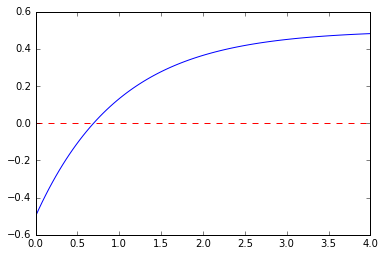

In [23]:
def f(x):
    return 0.5 - np.exp(-x)

x = np.linspace(0,4,100)
y = f(x)
plt.plot(x,y)
plt.axhline(0,color='r',ls='--')

In [24]:
def bisectionmet(func, x1, x2, tol=1e-3, nmax=10):
    f1 = func(x1)
    f2 = func(x2)
    assert f1*f2< 0, 'Error: nilai 0 tidak terdapat di antara x1 dan x2'
    for i in range(nmax):
        xm = 0.5*(x1+x2)
        fm = func(xm)
        if fm*f2 < 0:
            x1 = xm
            f1 = fm
        else:
            x2 = xm
            f2 = fm
        print(x1,x2,f1,f2)
        if abs(x1-x2) < tol:
            return x1
    print('Jumlah maksimum iterasi telah tercapai')
    return x1
    
xzero = bisectionmet(f,0,4,nmax=20)  
print('lokasi dari titik nol fungsi dan nilai dari fungsi: ',xzero,f(xzero))  

0 2.0 -0.5 0.364664716763
0 1.0 -0.5 0.132120558829
0.5 1.0 -0.106530659713 0.132120558829
0.5 0.75 -0.106530659713 0.027633447259
0.625 0.75 -0.035261428519 0.027633447259
0.6875 0.75 -0.00283157797094 0.027633447259
0.6875 0.71875 -0.00283157797094 0.0126389232864
0.6875 0.703125 -0.00283157797094 0.0049641030738
0.6875 0.6953125 -0.00283157797094 0.00108148841353
0.69140625 0.6953125 -0.000871223429674 0.00108148841353
0.69140625 0.693359375 -0.000871223429674 0.000106085964203
0.6923828125 0.693359375 -0.000382330131828 0.000106085964203
lokasi dari titik nol fungsi dan nilai dari fungsi:  0.6923828125 -0.000382330131828


In [ ]:
xzero = bisection(np.cos, 0, 3, tol=1e-6, nmax=30)
print('fungsi cos(x) bernilai nol di antara 0 dan pi pada titik:',xzero)
print('error relatif:',(xzero-np.pi/2)/(np.pi/2))

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

In [63]:
def f(x):
    return 0.5 - np.exp(-x)
    
def fp(x):
    return np.exp(-x)

def newtonsmet(func, funcp, xs, tol=1e-6, nmax=10):
    f = func(xs)
    for i in range(nmax):
        fp = funcp(xs)
        xs = xs - f/fp
        f = func(xs)
        print(xs,func(xs))
        if abs(f) < tol: 
            print('batas toleransi tercapai dalam',i+1,'iterasi')
            break
    if abs(f) > tol:
        print('Jumlah maksimum iterasi telah tercapai sebelum nilai 0 berhasil didekati')
    return xs

print('titik mula di x=1')
xzero = newtonsmet(f,fp,1)
print('xzero,f(xzero) ',xzero,f(xzero))

print('titik mulai di x=4')
xzero = newtonsmet(f,fp,4,nmax=40)
print('xzero,f(xzero) ',xzero,f(xzero))

titik mula di x=1
0.64085908577 -0.0268396291473
0.691803676235 -0.000672203615638
0.693146278462 -4.5104915336e-07
batas toleransi tercapai dalam 3 iterasi
xzero,f(xzero)  0.693146278462 -4.5104915336e-07
titik mulai di x=4
-22.2990750166 -4834652137.25
-21.2990750167 -1778569126.38
-20.299075017 -654299016.164
-19.2990750177 -240703156.293
-18.2990750198 -88549742.4933
-17.2990750254 -32575629.6522
-16.2990750408 -11983904.3001
-15.2990750825 -4408631.88486
-14.2990751959 -1621844.90201
-13.2990755042 -596643.264099
-12.2990763422 -219492.658455
-11.2990786202 -80746.7044133
-10.2990848124 -29704.920376
-9.29910164433 -10927.697389
-8.29914739753 -4019.94309239
-7.29927176193 -1478.72230925
-6.29960977738 -543.859447306
-5.30052828812 -199.942673493
-4.30302276693 -73.4229080399
-3.3097865701 -26.879281291
-2.32804855421 -9.75790424455
-1.37679145414 -3.4621684118
-0.502984979508 -1.15365002236
0.194653581712 -0.323119752408
0.587208554986 -0.0558768205856
0.687728703544 -0.002716591

In [64]:
xzero = newtonsmet(np.sin, np.cos, 1)
print('titik mula di x=1')
print('xzero,sin(xzero) ', xzero, np.sin(xzero))

xzero = newtonsmet(np.sin, np.cos, 1.5)
print('titik mula di x=1.5')
print('xzero,sin(xzero) ', xzero, np.sin(xzero))
print('xzero / pi ', xzero/np.pi)

-0.557407724655 -0.52898809709
0.0659364519248 0.0658886845842
-9.57219193251e-05 -9.57219191789e-05
2.92356620141e-13 2.92356620141e-13
batas toleransi tercapai dalam 4 iterasi
titik mula di x=1
xzero,sin(xzero)  2.92356620141e-13 2.92356620141e-13
-12.6014199472 -0.035042157161
-12.5663562551 1.43592405006e-05
-12.5663706144 -1.28649811974e-15
batas toleransi tercapai dalam 3 iterasi
titik mula di x=1.5
xzero,sin(xzero)  -12.5663706144 -1.28649811974e-15
xzero / pi  -4.0


<a href="#back2">Kembali ke Latihan 2</a>

<a name="ex3answer">Kunci Jawaban untuk Latihan 3</a>

In [70]:
import scipy.optimize as so

def g(x):
    return np.log(x**2)-2

x = so.newton(g,1)
print('nilai dari x:', x)
print('ln(x^2):', np.log(x**2))

nilai dari x: 2.71828182846
ln(x^2): 2.0


<a href="#back3">Kembali ke Latihan 3</a>